Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 2: Osnovni koncepti strojnog učenja

(c) 2015 Jan Šnajder

<i>Verzija: 0.7 (2015-10-21)</i>

In [1]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy.random import normal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Tipični koraci primjene algoritma SU

* Prostor primjera

* Hipoteza i model

* Empirijska pogreška

* Prostor inačica

* Složenost modela

* Induktivna pristranost

* Tri komponente svakog algoritma SU

* Primjer: regresija

* Problem šuma

* Odabir modela

# Tipični koraci primjene algoritma SU



1. Priprema podataka

2. (Označavanje podataka za učenje i ispitivanje)

3. (Redukcija dimenzionalnosti)

4. **Odabir modela**

5. **Učenje modela**

6. **Vrednovanje modela**

7. **Dijagnostika i ispravljanje (debugging)**

8. Instalacija (deployment)


* Naš fokus su koraci 4-7

# Prostor primjera


* Prostor primjera (ulazni prostor): $\mathcal{X}$


* Dimenzija ulaznog prostora: $n$


* Primjer je vektor u ulaznom prostoru: $\mathbf{x} = (x_1, x_2, \dots, x_n)^T \in \mathcal{X}$


* Oznaka (engl. *label*) klase (za klasifikaciju) ili ciljna vrijednost (za regresiju): $y$


* Skup oznaka klase: $\mathcal{Y} = \{0, \dots, K\}$
  * Broj klasa: $K$
  * Binarna klasifikacija: $K=2$, $\mathcal{Y} = \{0,1\}$


* Broj primjera: $N$


* Skup označenih primjera za učenje: $\mathcal{D} = \big\{(x^{(i)}, y^{(i)})\big\}_{i=1}^N \subseteq \mathcal{X}\times\mathcal{Y}$


* Matrično:
\begin{array}{lllll|l}
&x_1 & x_2 & \cdots & x_n & \mathbf{y}\\
\hline
\mathbf{x}^{(1)} = & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} & y^{(1)}\\
\mathbf{x}^{(2)} = & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} & y^{(2)}\\
& \vdots\\
\mathbf{x}^{(N)} = & x_1^{(N)} & x_2^{(N)} & \cdots & x_n^{(N)} & y^{(N)}\\
\end{array}
Matrica $\mathcal{D}$ sastavljena je od matrice $\mathbf{X}_{N\times n}$ i vektora $\mathbf{y}_{N\times 1}$


# Hipoteza i model

* Hipoteza: $h : \mathcal{X} \to \mathcal{Y}$
  * Funkcija koja svakom primjeru (iz prostora primjera) dodjeljuje oznaku klase (iz skupa oznaka klase)


* Binarna klasifikacija: $h : \mathcal{Y} \to \{0, 1\}$
  * Definicija: Primjer $\mathbf{x}\in\mathcal{X}$ **zadovoljava** hipotezu $h$ akko $h(\mathbf{x})=1$
  * Definicija: Hipoteza $h$ je **konzistentna** s primjerom $(\mathbf{x}, y)$ akko $h(\mathbf{x})=y$


* Općenitije: $h(\mathbf{x} | \theta)$
  * Funkcija parametrizirana parametrima $\theta$ (vektor parametara)
  * Npr.:
    * Linearna regresija: $h(x) = \theta_1 x + \theta_0$
    * Linearan klasifikacijski model: $h(x_1,x_2|\theta_0,\theta_1,\theta_2) = \mathbf{1}\{\theta_1 x_1 + \theta_2 x_2 + \theta_0 \geq 0\}$



* Model $\mathcal{H}$: skup hipoteza $h$


* Formalno: $\mathcal{H} = \big\{ h(\mathbf{x} | \theta)\big\}_{\theta}$
  * Familija funkcija parametriziranih s $\theta$
  
  
* Učenje (treniranje modela) svodi se na **pretraživanje** prostora hipoteza $\mathcal{H}$ i nalaženje **najbolje** hipoteze $h\in \mathcal{H}$
  * Najbolja hipoteza: ona koja najtočnije klasificira primjere (klasifikacija) odnosno daje vrijednosti najbliže ciljnim vrijednostima (regresija)
  * Optimizacijski problem!
  
  
* [Primjer: Ulazni prostor + prostor parametara]


* $\mathcal{H}$ je vrlo velik, pa nam često treba heuristička optimizacija

# Empirijska pogreška

* Iskazuje koliko točno hipoteza klasificira primjere (klasifikacija) ili koliko su vrijednosti blizu ciljnih vrijednosti (regresija)


* Pogreška klasifikacija (engl. *misclassification error*):

$$
E(h|\mathcal{D}) 
= \frac{1}{N} \sum_{i=1}^N \mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}
$$

* Specifično, za binarnu klasifikaciju s $\mathcal{Y}=\{0,1\}$:

$$
E(h|\mathcal{D}) = \frac{1}{N} \sum_{i=1}^N |h(\mathbf{x})^{(i)} - y^{(i)}|
$$

* [Primjer]


* Vrijednost pogreške načinjene na pojedinačnom primjeru (funkcija unutar sume) zove se **funkcija gubitka** (engl. *loss function*)
  * Gubitak $\mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}$ zove se **gubitak nula-jedan** (engl. *zero-one loss*)

# Prostor inačica (engl. *version space*)


* $\mathit{VS}_{\mathcal{H},\mathcal{D}} \subseteq \mathcal{H}$


* Skup hipoteza iz $\mathcal{H}$ koje su konzistentne s primjerima za učenje $\mathcal{D}$

$$
\mathit{VS}_{\mathcal{H},\mathcal{D}} =
\Big\{h\in\mathcal{H} \mid \forall(\mathbf{x},y)\in\mathcal{D}.\ \big(h(\mathbf{x})=y\big)\Big\}
$$

* [Primjer]



# Složenost modela


* Idealno, u modelu $\mathcal{H}$ postoji hipoteza $h$ koja je konzistentna s $\mathcal{D}$, tj. hipoteza za koju vrijedi $E(h|\mathcal{D}) = 0$


* No, moguće je da takva $h$ ne postoji, tj. $\forall h\in\mathcal{H}. E(h|\mathcal{D}) > 0$


* Tada kažemo da model $\mathcal{H}$ nije dovoljne **složenosti** (ili kapaciteta)


* [Primjer]


* [Zadatak: 6 primjera]

#Induktivna pristranost (engl. *inductive bias*)

* Učenje hipoteze je **loše definiran problem**: $h$ ne slijedi deduktivno iz $\mathcal{D}$


* Primjer 1: Učenje Booleove funkcije

\begin{array}{ccc|c}
x_1 & x_2 & x_3 & y\\
\hline
0&0&0&\color{red}{\textbf{?}}\\
0&0&1&\color{red}{\textbf{?}}\\
0&1&0&1\\
0&1&1&0\\
1&0&0&1\\
1&0&1&0\\
1&1&0&\color{red}{\textbf{?}}\\
1&1&1&1\\
\end{array}

* $N = |\mathcal{D}|=5$, $n=3$, $\mathcal{X} = \{0,1\}^3$, $|\mathit{VS}| = 2^{2^n - N} = 8$


* **Generalizacija** - sposobnost klasifikacije još neviđenih primjera


* Učenje i generalizacija nisu mogući bez **dodatnih pretpostavki**
  * *Futility of bias-free learning*


* **Induktivna pristranost** (engl. inductive bias)
  * $\mathcal{L}$ - algoritam učenja
  * $h_\mathcal{L}$ - hipoteza inducirana pomoću $\mathcal{L}$ na $\mathcal{D}$
  * $h_\mathcal{L}(\mathbf{x})$ - klasifikacija primjera $\mathbf{x}\in\mathcal{X}$
  * Induktivna pristranost od $\mathcal{L}$ je bilo koji skup minimalnih pretpostavki $\mathcal{B}$ takvih da 
  
$$
  \forall \mathcal{D}.\,\forall\mathbf{x}\in \mathcal{X}.\,\big((\mathcal{B}\land\mathcal{D}\land\mathbf{x})\ \vdash\ h_\mathcal{L}(\mathbf{x})\big)
$$


* Skup pretpostavki koje *od indukcije čine dedukciju*


* Dvije vrste induktivne pristranosti:

  * **Pristranost jezika** (pristranost ograničenjem): odabiremo model $\mathcal{H}$ koji ograničava skup prikazivih hipoteza
  
  * **Pristranost preferencijom** (pristranost pretraživanja): definiramo način pretraživanja unutar $\mathcal{H}$
  
  
* Većina aloritama SU kombinira obje vrste pristranosti


* [Primjer 2: Ulazni prostor + prostor parametara]


* Zadatak 3: 
  * Učenje Booleove funkcije u $\mathcal{X}=\{0,1\}$, $\mathcal{H}$ je skup pravaca
  * Q: Koja je ovo vrsta pristranosti?
  * Q: Koliko različitih hipoteza postoji?
  * Q: Postoji li za svako označavanje konzistentna hipoteza u $\mathcal{H}$?
  
  
* Razmotrimo opet Primjer 1, uz $\mathcal{H} = \text{skup ravnina u $\mathbb{R}^3$}$

#Tri komponente svakog algoritma SU


* **(1) Model** $\mathcal{H}$
  * $\mathcal{H} = \big\{ h(\mathbf{x} | \theta)\big\}_{\theta}$


* **(2) Funkcija gubitka** $L(y, h(\mathbf{x}))$

  * Izračunava kolika je pogreška hipoteze (naučenog modela) na primjeru $\mathbf{x}^{(i)}$

  * Uobičajene funkcije gubitka:
    * Kvadratno odstupanje (regresija): $L\big(y,h(\mathbf{x}^{(i)}|\theta)\big)=(h(\mathbf{x}^{(i)}|\theta) - y^{(i)})^2$
    * Gubitak 0-1 (klasifikacija): $L\big(y,h(\mathbf{x}^{(i)}|\theta)\big) = \mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}$
 
 
* **Funkcija pogreške** definirana je kao očekivana vrijednost funkcije gubitka na primjerima iz $\mathcal{X}\times\mathcal{Y}$
$$
E(h) = \mathbb{E}_{\mathbf{x},y}[L]
$$
  * Međutim, prava distribucija primjera i oznaka, $P(\mathbf{x}, y)$ je nepoznata, pa umjesto toga računamo *empirijsku pogrešku* (pogrešku na skupu označenih primjera $\mathcal{D}$)
$$E(h|\mathcal{D}) = \mathbb{E}_{D}[L] = \frac{1}{N} \sum_{i=1}^N L\big(y^{(i)}, h(\mathbf{x}^{(i)})\big)$$
  * Budući da su hipoteze indeksirane preko parametara $\theta$, možemo pisati
$$E(\color{red}{\theta}|\mathcal{D}) = \mathbb{E}_{D}[L] = \frac{1}{N} \sum_{i=1}^N L\big(y^{(i)}, h(\mathbf{x}^{(i)}|\color{red}{\theta})\big)$$

* **(3) Optimizacijski postupak**

  * Postupak kojim nalazimo hipotezu $h^*$ koja minimizira empirijsku pogrešku
$$
h^* = \mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D})
$$
tj. 
$$
\theta^* = \mathrm{argmin}_{\theta} E(\theta|\mathcal{D})
$$


* Optimizacija može biti analitička ili heuristička
  * Analitičke postupke koristimo kada postoji rješenje u **zatvorenoj formi**


* Gornje tri komponente definiraju i induktivnu pristranost svakog algoritma
  * Q: Koja vrsta induktivne pristranosti je vezana uz koje komponente?

# Primjer: regresija

* $y \in \mathbb{R}$


* Na temelju $\mathcal{D}=\{(\mathbf{x}^{(i)},y^{(i)})\}$ učimo funkciju $h$ koja aproksimira nepoznatu funkciju $f:\mathcal{X}\to\mathbb{R}$


* Idealno, $y^{(i)}=f(\mathbf{x}^{(i)})$, ali zbog šuma  $y=f(\mathcal{x}^{(i)})+\varepsilon$ 


* [Primjeri: Box Office Revenue, prosjek ocjena, cijena automobila]


* Funkcija gubitka je kvadratna:
$$
L(y, h(\mathbf{x})) = (y - h(\mathbf{x}))^2
$$
pa je empirijska pogreška hipoteze
$$
E(h|\mathcal{D})=\color{red}{\frac{1}{2}}\sum_{i=1}^N\big(y^{(i)}-h(\mathbf{x}^{(i)})\big)^2
$$
NB: Umjesto $1/N$, kod pogreške regresije koristimo $1/2$ zbog kasnije matematičke jednostavnosti. To međutim nema utjecaja na optimizaciju (radi se o konstanti)

* **Linearan model**: hiperravnina u $\mathbb{R}^n$

$$
h(\mathbf{x}|\mathbf{w}) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + w_0 = 
\sum_{i=1}^n w_i x_i + w_0 = \mathbf{w}^T\mathbf{x} + w_0
$$

* Za $n=2$ imamo $\mathcal{X}=\mathbb{R}$. Model je
$$
h(x|\mathbf{w}) = w_1 x + w_0
$$
funkcija gubitka je
$$
L(y^{(i)}, h(x^{(i)})) = \big(y^{(i)}-(w_1 x^{(i)} + w_0)\big)^2
$$
a pogreška je

$$
E(h|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(y^{(i)}-(w_1 x^{(i)} + w_0)\big)^2
$$

**(1) Model**:

In [2]:
def h(x, w): return w[1] * x + w[0]

**(2) Funkcija gubitka** (i njoj odgovarajuća funkcija pogreške):

In [3]:
def quadratic_loss(y, hx):
    return (y - hx)**2
    
def error(h, X, y):
    err = 0
    for xi, yi in zip(X, y):
        err += quadratic_loss(yi, h(xi))
    return 0.5 * err

Funkcija koja generira podatke (i koju zapravo želimo naučiti):

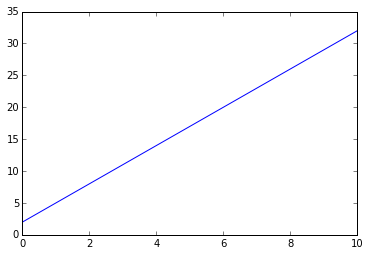

In [4]:
def f(x): return 3 * x + 2
xs = sp.linspace(0, 10)
plt.plot(xs, f(xs));

Skup primjera za učenje $\mathcal{D}=(\mathbf{X},\mathbf{y})$ dobiven je iz $f(x)$, uz dodatan šum:

In [5]:
X = linspace(0, 10)
y = f(X) + 2 * stats.norm.rvs(scale=3, size=50)

In [6]:
X

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

In [7]:
len(_)

50

In [8]:
y

array([  0.67064434,   7.31239169,   9.56400499,   0.2890283 ,
         6.96746129,  14.86178311,  12.60975181,  -0.28934441,
         6.44890713,   7.28992995,  13.72389263,  19.61341887,
        15.62669111,  14.43066191,   8.76710654,  19.48489724,
        -1.27170224,  10.81539578,  21.36130674,  14.3632114 ,
        14.6825962 ,  12.37886072,   5.04860612,  27.01349903,
        14.15906195,   8.62295154,  16.36435167,  15.92878647,
        12.01783068,  25.11064324,  24.71867488,  25.64192171,
        21.53657671,  26.70048261,  30.36258764,  22.37268596,
        27.29906374,  32.14498482,  12.14117217,  16.54494565,
        32.29949169,  13.98599392,  26.27138558,  28.5969641 ,
        29.10679964,  26.91455084,  32.36537598,  31.40052367,
        29.39580935,  23.59296505])

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


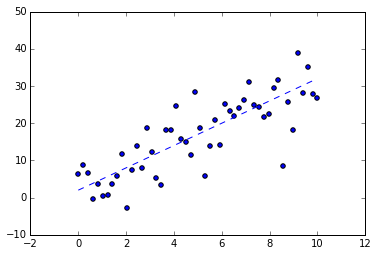

In [6]:
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.show()

Dvije hipoteze iz našeg modela:

In [7]:
def h1(x): return h(x, [0,1])
def h2(x): return h(x, [0,2])

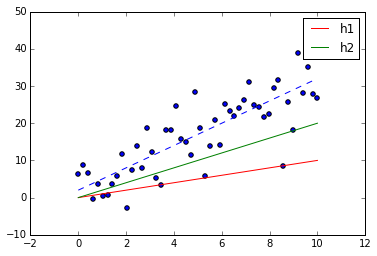

In [8]:
weights = [[0,1], [0,2], [1,2]]
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.plot(xs, h1(xs), 'r', label='h1')
plt.plot(xs, h2(xs), 'g', label='h2')
plt.legend();

Empirijske pogreške hipoteza na skupu $\mathcal{D}$:

In [9]:
error(h1, X, y)

5025.9784792784731

In [10]:
error(h2, X, y)

2156.5878715137965

**(3) Optimizacijski postupak**

* Tražimo $h\in\mathcal{H}$ koja minimizira empirijsku pogrešku

$$
h^* = 
\mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D}) = 
\mathrm{argmin}_{h\in\mathcal{H}} \frac{1}{2}
\sum_{i=1}^N\big(y^{(i)}-h(x^{(i)})\big)^2
$$

* Hipoteza $h$ je indeksirana parametrima $(w_0, w_1)$, dakle zapravo tražimo

$$
(w_0,w_1)^* =
\mathrm{argmin}_{w_0,w_1} \frac{1}{2} 
\sum_{i=1}^N\big(y^{(i)}-(w_1 x^{(i)} + w_0)\big)^2
$$

* U ovom slučaju postoji **analitičko rješenje** (rješenje u zatvorenoj formi)

\begin{eqnarray*}
    && \nabla_{w_0,w_1} E(h|\mathcal{D})=0\\
    &&\frac{\partial}{\partial w_0}\Big[
\frac{1}{2}\sum_i^N\big(y^{(i)}-(w_1 x^{(i)}+ w_0)\big)^2\Big] = 0 \\
&&\frac{\partial}{\partial w_1}\Big[\frac{1}{2}\sum_i^N\big(y^{(i)}-(w_1 x^{(i)}+
w_0)\big)^2\Big] = 0\\
&&\vdots\\
&& w_0= \bar{y} - w_1\bar{x}\\
&& w_1 = \frac{\sum_i^N x^{(i)}y^{(i)} - N\bar{x}\bar{y} }
{\sum_i^N(x^{(i)})^2 - N\bar{x}^2}
\end{eqnarray*}


In [11]:
N = len(X)
x_mean = sp.mean(X)
y_mean = sp.mean(y)
w1 = (np.dot(X, y) - N * x_mean * y_mean) / (sum(X**2) - N * (x_mean**2))
w0 = sp.mean(y) - w1 * sp.mean(X)

In [12]:
print w1, w0

2.82127363032 2.57918900236


In [13]:
def h_best(x): return h(x, [w0,w1])

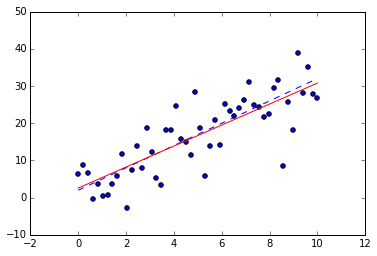

In [14]:
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.plot(xs, h_best(xs), 'r');

In [15]:
error(h_best, X, y)

892.91671935457725

* U gornjem primjeru radili smo s modelom prvog stupnja

$$
h_1(x) = w_1 x + w_0
$$

* Međutim, mogli smo odabrati i složeniji model, npr. polinom drugog stupnja:
$$
h_2(x) = w_2 x^2 + w_1 x + w_0
$$
ili četvrtog stupnja:
$$
h_4(x) = w_4 x^4 + w_3 x^3 + w_2 x^2 + w_1 x + w_0
$$

* Ovo je i dalje linearna regresija, i dalje ima analitičko rješenje

In [16]:
from SU import PolyRegression

In [18]:
X1 = X.reshape((50,1))
h2 = PolyRegression(2).fit(X1, y)
h4 = PolyRegression(4).fit(X1, y)

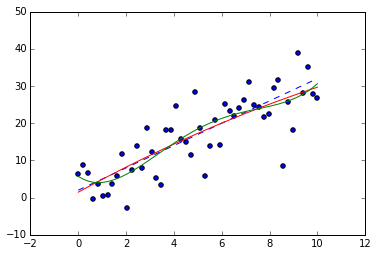

In [19]:
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.plot(X1, h2.predict(X1), 'r');
plt.plot(X1, h4.predict(X1), 'g');

In [20]:
error(h2, X, y)

885.87751643487434

In [21]:
error(h4, X, y)

845.62372708741623


* Možemo očekivati da vrijedi:
$$
E(h_4|\mathcal{D}) \leq E(h_2|\mathcal{D}) \leq E(h_1|\mathcal{D})
$$
Q: Zašto?


* Q: Koji model odabrati u ovom slučaju?


* Q: Koji model općenito odabrati za neke podatke $\mathcal{D}$?

# Problem šuma

* **Šum** je neželjena anomalija u podacima


* Mogući uzroci:
  * Nepreciznost pri mjerenju značajki
  * Pogreške u označavanju (engl. *teacher noise*)
  * Postojanje skrivenih značajki (latentnih varijabli)
  * Nejasne granice klasa (subjektivnost)


* Zbog šuma je granica između pozitivnih i negativnih primjera složenija nego što bi idealno bila!


* [Primjer 1: binarna klasifikacija po značajkama dobi i prihoda]


* Jednostavni modeli ne mogu doseći $E(h|\mathcal{D})=0$


* S druge strane, složeni modeli uče šum, a ne pravu klasifikaciju!


* [Primjer 2]


* Šum u načelu nije moguće odvojiti od pravih podataka
  * Moguće je samo za stršeće vrijednosti (engl. *outliers*)

# Odabir modela

* Moramo odabrati model $\mathcal{H}$ (učenje bez pristranosti je uzaludno)!


* Često radimo odabir modela unutar neke familije modela (npr. kod regresije: odabir stupnja polinoma)


* Stupanj polinoma je **hiperparametar** modela ($w_i$ su parametri)


* ** Odabir modela = optimizacija modela, optimizacija hiperparametara **


### Primjer: regresija

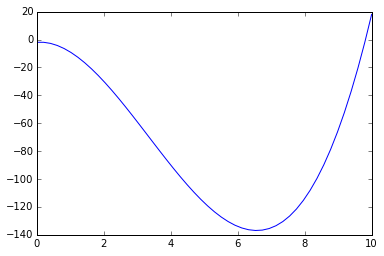

In [22]:
def g(x): return x**3 - 10 * x**2 + 2 * x - 2
xs = sp.linspace(0, 10)
plt.plot(xs, g(xs));

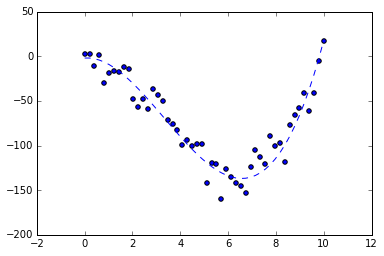

In [23]:
X = sp.linspace(0,10)
y = g(X) + 5 * stats.norm.rvs(scale=3, size=50)
plt.plot(xs, g(xs), '--')
plt.scatter(X, y)
plt.show()

error(h1) = 45943.12
error(h2) = 12409.02
error(h3) = 4554.71
error(h4) = 4480.06
error(h5) = 4262.50
error(h6) = 3971.45
error(h7) = 3663.57


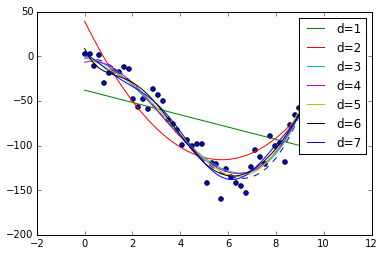

In [24]:
plt.plot(xs, g(xs), '--')
plt.scatter(X, y)

X1 = X.reshape((50,1))
for degree in range(1, 8):
    h = PolyRegression(degree).fit(X1, y)
    plt.plot(X1, h.predict(X1), label="d=%d" % degree);
    print "error(h%d) = %.2f" % (degree, error(h, X, y))
plt.legend()
plt.show()


* Model koji odgovara pravoj funkciji koja je generirala podatke je $h_3$, tj. **optimalan hiperparametar je $d=3$**


* Modeli $h_1$ i $h_2$ imaju veću pogrešku od $h_3$ i njih sigurno ne bismo uzeli


* Međutim, modeli $h_4$ i $h_5$ imaju manju pogrešku od $h_3$

* Očito, što je veći kapacitet modela $\mathcal{H}$, to je manja pogreška $E(h|\mathcal{D})$, $h\in\mathcal{H}$


* Ali model mora moći **generalizirati!**


* Preferiramo jednostavne modele
  * bolja generalizacija
  * lakše učenje/uporaba
  * lakše tumačenje


* **Occamova britva**

<img src="http://muslimsi.com/wp-content/uploads/2014/12/quote-occam-s-razor-no-more-things-should-be-presumed-to-exist-than-are-absolutely-necessary-i-e-the-william-of-occam-372636-846x398.jpg" width="70%" align="left">




* Trebamo odabrati model koji točno odgovara *pravoj složenosti* funkcije koju nastojimo naučiti


* Dvije krajnosti:

  * **Podnaučenost (engl. underfitting)** - $\mathcal{H}$ je prejednostavan u odnosu na stvarnu funkciju $\Rightarrow$ loša klasifikacija na viđenim i neviđenim primjerima

  * **Prenaučenost (engl. overfitting)** - $\mathcal{H}$ je previše složen u odnosu na stvarnu funkciju $\Rightarrow$ loša klasifikacija na neviđenim primjerima (loša generalizacija)
  
  
* [Primjer: Podnaučenost/prenaučenost kod klasifikacije]


* Drugi pogled: 
  * Jednostavan model ima **visoku pristranost** (engl. high bias)
  * Složen model ima **visoku varijancu** (engl. high variance)
  * Odabir modela $\Rightarrow$ kompromis između pristranosti i varijance (engl. bias-variance tradeoff)
  * Optimalan model minimizira zajednički pristranost i varijancu


* **Pretpostavka induktivnog učenja**
    * Ako je **(1)** pogreška hipoteze na dovoljno velikom skupu primjera za učenje mala i **(2)** ako model nije suviše složen, hipoteza će dobro klasificirati i nove, **(3)** slične primjere

# Unakrsna provjera (engl. *cross-validation*)

* Metoda za procjenu sposobnosti generalizacije modela
    * Skup primjera dijelimo na **skup za učenje** i **skup za ispitivanje**
     $$
        \mathcal{D} = \mathcal{D}_{\mathrm{train}} \cup \mathcal{D}_{\mathrm{test}}
     $$
    * Model učimo na skupu za učenje, a ispitujemo na skupu za ispitivanje
    * Primjeri iz skupa za ispitivanje model dosad nije vidio, pa na tom skupu dobivamo dobru (pravednu) procjenu pogreške generalizacije


* Računamo dvije pogreške za $h\in\mathcal{H}$:
    * **Pogreška učenja** (engl. *train error*): empirijska pogreška hipoteze na skupu za učenje, $P(h|\mathcal{D}_{\mathrm{train}})$
    * **Ispitna pogreška** (engl. *test error*): empirijska pogreška hipoteze na skupu za ispitivanje, $P(h|\mathcal{D}_{\mathrm{test}})$ 
    

* $P(h|\mathcal{D}_{\mathrm{train}})$ pada sa složenošću modela, dok $P(h|\mathcal{D}_{\mathrm{test}})$ tipično prvo opada a zatim raste


* Optimalan model je onaj koji minimizira $P(h|\mathcal{D}_{\mathrm{test}})$


* [Graf: Pogreške s obzirom na složenost modela]


* Što ako želimo optimirati parametre modela?
   
   * Ne možemo to raditi na skupu za provjeru!
   
   * Trebamo još jedan skup: **skup za provjeru** (engl. *validation set*)
   
   * Tročlana particija skupa primjera:
    $$
        \mathcal{D} = \mathcal{D}_{\mathrm{train}} \cup \mathcal{D}_{\mathrm{val}} \cup \mathcal{D}_{\mathrm{test}}
    $$
    $$
        \mathcal{D}_{\mathrm{train}} \cap \mathcal{D}_{\mathrm{val}} = 
        \mathcal{D}_{\mathrm{train}} \cap \mathcal{D}_{\mathrm{test}} =
        \mathcal{D}_{\mathrm{val}} \cap \mathcal{D}_{\mathrm{test}} = \emptyset
    $$


### Primjer: Regresija

In [25]:
XY = np.column_stack((X1, y))
np.random.shuffle(XY)

In [28]:
X_train, y_train = XY[:30,0:1], XY[:30,1]
X_test, y_test = XY[30:,0:1], XY[30:,1]

In [29]:
len(X_train), len(X_test)

(30, 20)

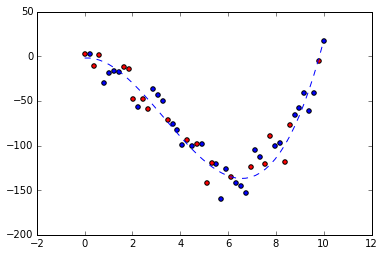

In [30]:
plt.plot(xs, g(xs), '--')
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r');

train_error(h1) = 29464.92; test_error(h1) = 17336.67
train_error(h2) = 7791.35; test_error(h2) = 4718.77
train_error(h3) = 3002.65; test_error(h3) = 1657.94
train_error(h4) = 2912.17; test_error(h4) = 1787.16
train_error(h5) = 2612.13; test_error(h5) = 1754.30
train_error(h6) = 2158.16; test_error(h6) = 2150.77
train_error(h7) = 1937.27; test_error(h7) = 1916.90


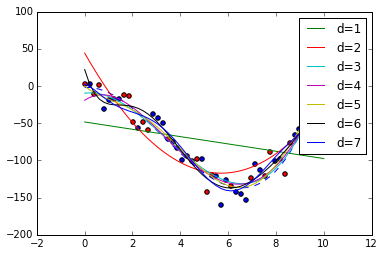

In [31]:
plt.plot(xs, g(xs), '--')
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r');

for degree in range(1, 8):
    h = PolyRegression(degree).fit(X_train, y_train)
    plt.plot(X1, h.predict(X1), label="d=%d" % degree);
    print "train_error(h%d) = %.2f; test_error(h%d) = %.2f" % (degree, error(h, X_train, y_train), degree, error(h, X_test, y_test))
plt.legend()
plt.show()

In [32]:
train_errors = []
test_errors = []
degrees = range(1,8)
for degree in degrees:
    h = PolyRegression(degree).fit(X_train, y_train)
    train_error = error(h, X_train, y_train)
    test_error = error(h, X_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

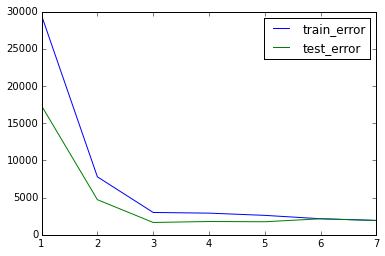

In [33]:
plt.plot(list(degrees), train_errors, label="train_error")
plt.plot(list(degrees), test_errors, label="test_error")
plt.legend()
plt.show()

# Odabir modela kao minimizacija rizika*

* Pogled na problem optimizacije modela iz **statističke teorije učenja**


* Rizik = očekivanje gubitka = pogreška hipoteze


* **Empirijski rizik $R_{\mathrm{emp}}$** = procjena pogreške na skupu primjera, $E(h|\mathcal{D})$


* **Strukturni rizik $R_{\mathrm{struct}}$** = kvantifikacija složenosti modela
  * Npr.: broj parametara, veličina zapisa modela i sl.
  * Što je model složeniji, to je veći strukturni rizik
  

* Želimo modele $\mathcal{H}$ koji (za naučenu $h\in\mathcal{H}$) minimiziraju i empirijski i strukturni rizik
$$
R_{\mathrm{emp}}(h) + \lambda R_{\mathrm{struct}}(h)
$$
gdje $\lambda$ definira važnost empirijskog rizika u odnosu na strukturni


* [Grafikon: empirijska + strukturna pogreška]


* Dakle, umjesto minimizacije
$$
h^* = \mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D})
$$
imamo
$$
h^* = \mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D}) + \lambda R_{\mathrm{struct}}(h)
$$


* Minimizacija strukturnog rizika je alternativa unakrsnoj provjeri


* U praksi ipak koristimo unakrsnu provjeru (jer je pouzdanija)


* Često kombiniramo unakrsnu provjeru s minimizacjom strukturnog rizika (tzv. regularizacija)

# Sažetak

* **Hipoteza** je funkcija koja klasificira primjere (kod klasifikcije) ili daje brojčanu vrijednost (kod regresije), a **model** je skup hipoteza


* Različiti modeli imaju različite **složenosti** (kapacitete)


* Učenje nije moguće bez **induktivne pristranosti**, koja može **pristranost jezika** ili **pristranost preferencijom**


* Svaki algoritam SU ima tri komponente: **model**, **funkciju gubitka** i **optimizacijski postupak**


* Empirijsku pogrešku hipoteze izračunavamo kao očekivanje funkcije gubitka na skupu primjera


* Učenje modela svodi se na **optimizaciju parametara** modela s empirijskom pogreškom kao kriterijem
  * Konkretno, kod regresije postoji **analitičko rješenje** za taj problem


* Model koji je **podnaučen** ili **prenaučen** loše generalizira


* Odabir modela svodi se na **optimiranje hiperparametara** modela


* **Unakrsnom provjerom** možemo procijeniti **pogreška generalizacije** i odabrati optimalan model
